In [4]:
import cv2
import numpy as np
import pandas as pd
import os, sys

import matplotlib.pyplot as plt
import re

import shutil

import torch
import torch.utils.data
# import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import argparse
import re

sys.path.append("../")

from helpers import makedir
import model
import push
import prune
import train_and_test as tnt
import save
from log import create_logger
from preprocess import mean, std, preprocess_input_function

In [8]:
ppnet = torch.load("/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/006/400_19push0.8660.pth")

In [9]:
ppnet

PPNet(
	features: VGG19, batch_norm=False,
	img_size: 224,
	prototype_shape: (200, 128, 1, 1),
	proto_layer_rf_info: [7, 32, 268, 16.0],
	num_classes: 20,
	epsilon: 0.0001
)

In [15]:
for param in ppnet.last_layer.parameters():
    print(param.shape)

torch.Size([20, 200])


In [17]:
# Dir with the Prototypes
proto_dir = "/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/006/400_19push0.8660_nearest_train/"
proto_test_dir = "/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/006/400_19push0.8660_nearest_test/"

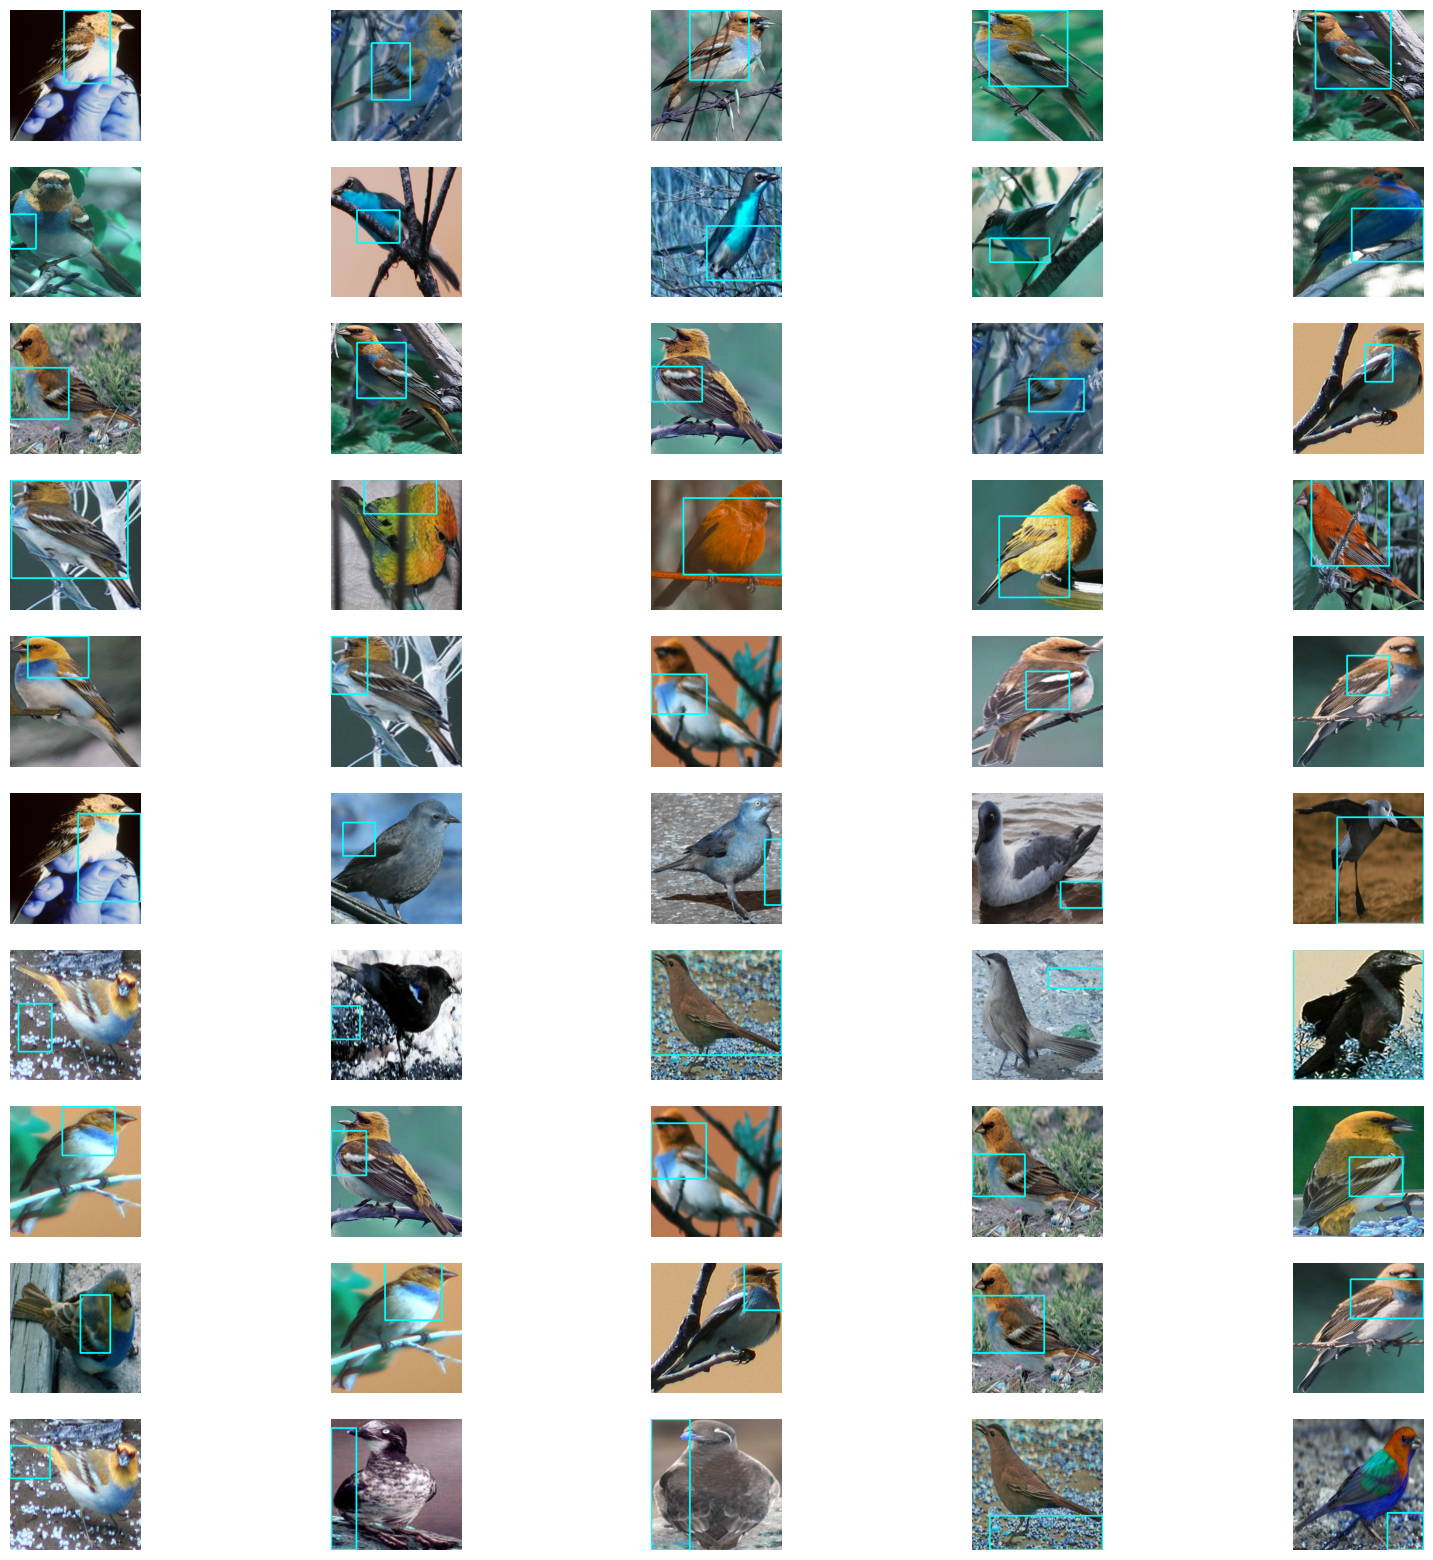

In [56]:
# Same thing as above just looking at more nearests
images = []

for i in range(60, 70):
    sub_imgs = []
    for j in range(1, 6):
        img = proto_dir + str(i) + "/nearest-" + str(j) + "_high_act_patch_in_original_img.png"
    
        img = cv2.imread(img)
        sub_imgs.append(img)
    images.append(sub_imgs)
    
f, axarr = plt.subplots(len(images), len(images[0]), figsize=(20,20)) 
for i in range(len(images)):
    for j in range(len(images[0])):
        
        axarr[i, j].imshow(images[i][j])
        axarr[i, j].axis('off')
# plt.imshow(img)
# plt.show()
# # cv2.waitKey(0)

# plt.figure(figsize=(120, 100), dpi=800)
plt.show()


In [64]:
for i, row in enumerate(param):
    row = row.cpu().detach().numpy()
    if i +1 == 2:
        for i, val in enumerate(list(np.abs(row) > 1)):
            if i >= 10 and i < 20:
                print(i, val)
                
        print(row[10:20])
        break

10 True
11 True
12 True
13 False
14 True
15 True
16 True
17 False
18 True
19 True
[1.2325052  1.261374   1.2391278  0.7967862  1.2250162  1.247071
 1.0414531  0.77199435 1.0966171  1.226215  ]


In [60]:
list(np.abs(row) > 1)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [45]:
arr = row[np.abs(row) > 1]
arr.max() - arr.min()

0.021041393

In [52]:
for i, row in enumerate(param):
    row = row.cpu().detach().numpy()
    len_info = len(row[np.abs(row) > 1])

    if len_info > 0:
        arr = row[np.abs(row) > 1]
        spread = arr.max() - arr.min()
        print(i + 1, len_info, spread)
    else:
        print(i + 1, len_info)


#     if len_info < 10:
#         print(row)


1 10 0.24165511
2 8 0.21992087
3 10 0.14856768
4 8 0.102844596
5 3 0.06510997
6 0
7 3 0.060392022
8 1 0.0
9 5 0.04203534
10 1 0.0
11 7 0.123431206
12 0
13 10 0.07290661
14 0
15 8 0.08912599
16 3 0.039563417
17 6 0.18797171
18 8 0.1946019
19 3 0.2726617
20 5 0.021041393


In [3]:
ppnet = torch.load("/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/007/400_19push0.8971.pth")

In [5]:
# Dir with the Prototypes
proto_dir = "/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/007/400_19push0.8971_nearest_train/"
proto_test_dir = "/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/007/400_19push0.8971_nearest_test/"

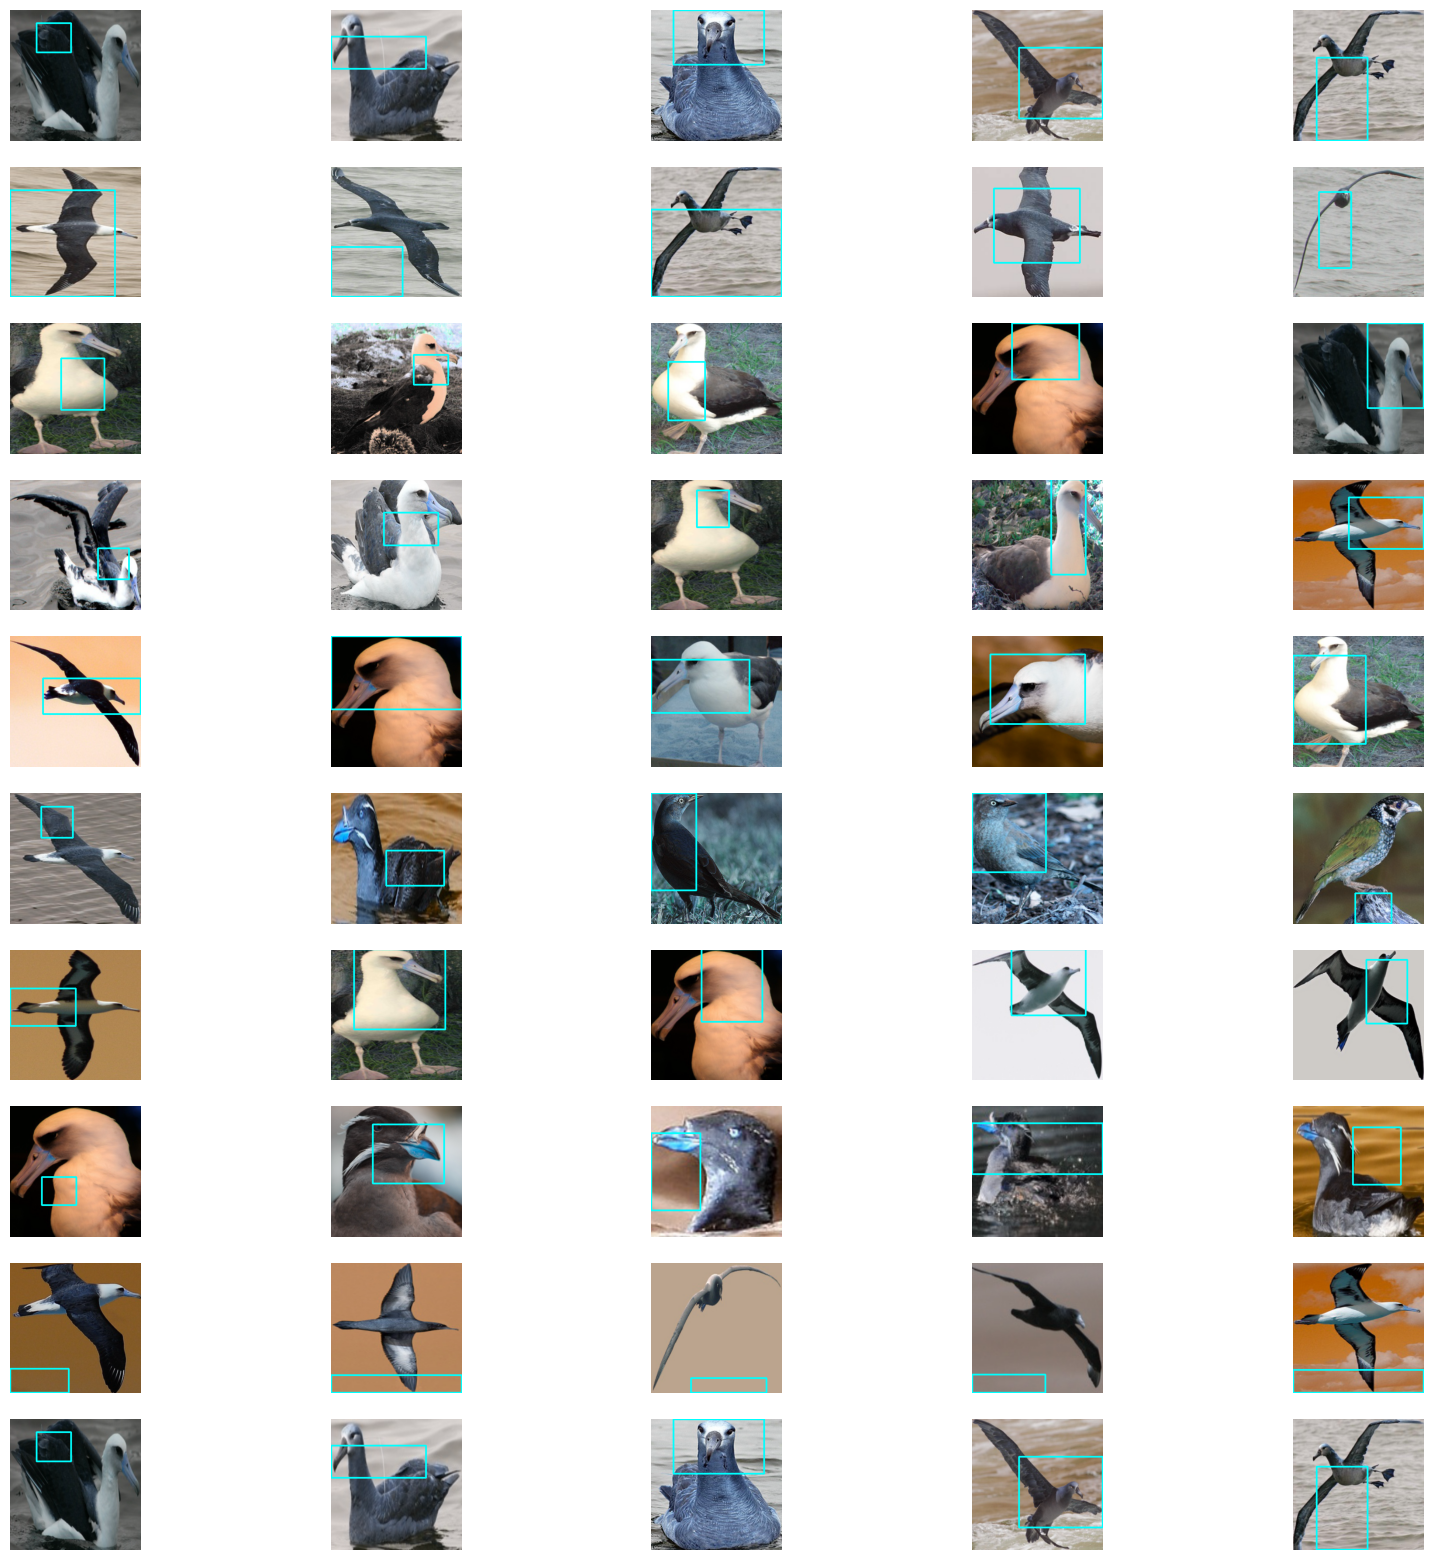

In [11]:
# Same thing as above just looking at more nearests
images = []

for i in range(10, 20):
    sub_imgs = []
    for j in range(1, 6):
        img = proto_dir + str(i) + "/nearest-" + str(j) + "_high_act_patch_in_original_img.png"
    
        img = cv2.imread(img)
        sub_imgs.append(img)
    images.append(sub_imgs)
    
f, axarr = plt.subplots(len(images), len(images[0]), figsize=(20,20)) 
for i in range(len(images)):
    for j in range(len(images[0])):
        
        axarr[i, j].imshow(images[i][j])
        axarr[i, j].axis('off')
# plt.imshow(img)
# plt.show()
# # cv2.waitKey(0)

# plt.figure(figsize=(120, 100), dpi=800)
plt.show()


In [8]:
for param in ppnet.last_layer.parameters():
    print(param.shape)

torch.Size([20, 200])


In [9]:
for i, row in enumerate(param):
    row = row.cpu().detach().numpy()
    if i +1 == 2:
        for i, val in enumerate(list(np.abs(row) > 1)):
            if i >= 10 and i < 20:
                print(i, val)
                
        print(row[10:20])
        break

10 False
11 False
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 False
[0.42944825 0.59923625 1.7929914  1.8073087  1.6753803  1.2013441
 1.7439361  1.4402351  1.571691   0.42944825]


In [10]:
for i, row in enumerate(param):
    row = row.cpu().detach().numpy()
    len_info = len(row[np.abs(row) > 1])

    if len_info > 0:
        arr = row[np.abs(row) > 1]
        spread = arr.max() - arr.min()
        print(i + 1, len_info, spread)
    else:
        print(i + 1, len_info)


#     if len_info < 10:
#         print(row)


1 7 0.725888
2 7 0.60596454
3 10 2.0691347
4 5 0.33294582
5 8 1.1850945
6 6 1.3153458
7 4 0.10010338
8 6 1.2682046
9 5 0.63209105
10 5 0.33002436
11 6 0.47042358
12 4 0.554307
13 7 0.8531916
14 8 0.43464088
15 6 1.5556676
16 6 1.2777079
17 6 1.0098915
18 6 1.5393188
19 6 1.8056009
20 4 1.2659153


In [13]:
ppnet = torch.load("/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/007/400push0.8971.pth")

In [14]:
# Dir with the Prototypes
proto_dir = "/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/007/400_19push0.8971_nearest_train/"
proto_test_dir = "/accounts/campus/robert_netzorg/scratch/saved_models/vgg19/007/400_19push0.8971_nearest_test/"

In [15]:
for param in ppnet.last_layer.parameters():
    print(param.shape)

torch.Size([20, 200])


In [16]:
for i, row in enumerate(param):
    row = row.cpu().detach().numpy()
    if i +1 == 2:
        for i, val in enumerate(list(np.abs(row) > 1)):
            if i >= 10 and i < 20:
                print(i, val)
                
        print(row[10:20])
        break

10 False
11 False
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 False
[0.43579203 0.6040134  1.7722596  1.786563   1.6561562  1.1927215
 1.7239326  1.427099   1.5573604  0.43579203]


## There's not really much change between training with the param or not